# Proposition TRAN-THUONG Tien-Thinh

Je n'ai pas trouvé la liste des ministres sur wikipedia, j'ai choisi d'utilisé :  
https://www.gouvernement.fr/composition-du-gouvernement  
Car ce site permet également d'aller chercher une photo, la biographie et la date de naissance des ministre

# Importation

In [1]:
import urllib
import pandas as pd
import bs4 

# Préparation Scraping

In [2]:
url = "https://www.gouvernement.fr/composition-du-gouvernement"
html = urllib.request.urlopen(url).read()
page = bs4.BeautifulSoup(html)
compo = page.find("div", {"class":"composition-du-gouvernement-contenu"}) # J'ai besoin que de la composition

In [3]:
ministres = compo.find_all("div", {"class":"ministre"})
print(f"Je trouve au total {len(ministres)} ministres.")

Je trouve au total 45 ministres.


## Quelques fonctions pour trouver l'age des ministres

In [4]:
import re, datetime, locale
from dateutil.parser import parse as parse_dt
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

def born_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
def calcul_age(url):
    html = urllib.request.urlopen(url).read()
    page = bs4.BeautifulSoup(html)
    s = page.find("div", {"id":"biography"}).text.replace("1er", "1") # un peu ad hoc
    expression = re.compile("[0-3]?\d \S* \d{4}") # renvoie des dates qui ne sont pas des dates de naissance
    str_date = expression.findall(s)[0]
    date_de_naissance = datetime.datetime.strptime(str_date, "%d %B %Y")
    return born_to_age(date_de_naissance)

# Extraction des données des Ministres

In [5]:
url_base = "https://www.gouvernement.fr"
i = 0
liste = []
for ministre in ministres:
    prenomnom = ministre.find("a", {"class":"ministre-nom"}).text
    fonction = ministre.find("p", {"class":"ministre-fonction"}).text
    photo = ministre.find("img")["src"]
    href = url_base + ministre.find("a", {"class":"ministre-nom"})["href"]
    try:
        age = calcul_age(href)
    except:
        
        age = np.NaN
    liste.append({
        'PrénomNom': prenomnom,
        'Fonction': fonction,
        'Photo': photo,
        'href': href,
        'Age': age
    })


In [6]:
df = pd.DataFrame(liste)
df

,PrénomNom,Fonction,Photo,href,Age
0,Élisabeth Borne,Première ministre,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/elisabeth...,61
1,Olivier Véran,Ministre délégué auprès de la Première ministr...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/olivier-v...,42
2,Franck Riester,Ministre délégué auprès de la Première ministr...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/franck-ri...,48
3,Isabelle Rome,Ministre déléguée auprès de la Première minist...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/isabelle-...,59
4,Charlotte Caubel,Secrétaire d’État auprès de la Première minist...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/charlotte...,50
5,Hervé Berville,Secrétaire d'État auprès de la Première minist...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/herve-ber...,32
6,Marlène Schiappa,Secrétaire d'État auprès de la Première minist...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/marlene-s...,39
7,Bruno Le Maire,"Ministre de l'Économie, des Finances et de la ...",https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/bruno-le-...,53
8,Gabriel Attal,Ministre délégué auprès du ministre de l'Écono...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/gabriel-a...,33
9,Roland Lescure,Ministre délégué auprès du ministre de l'Écono...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/roland-le...,55


# Affichage de la distribution des ages
L'age 0 est une erreur de scraping.

(array([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 3.,
        0., 0., 2., 0., 0., 4., 2., 2., 1., 0., 3., 0., 1., 0., 3., 0., 1.,
        1., 0., 3., 0., 3., 0., 2., 0., 1., 0., 2., 0., 1., 0., 0., 2., 0.,
        0., 0., 1., 0., 0., 2.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74]),
 <BarContainer object of 74 artists>)

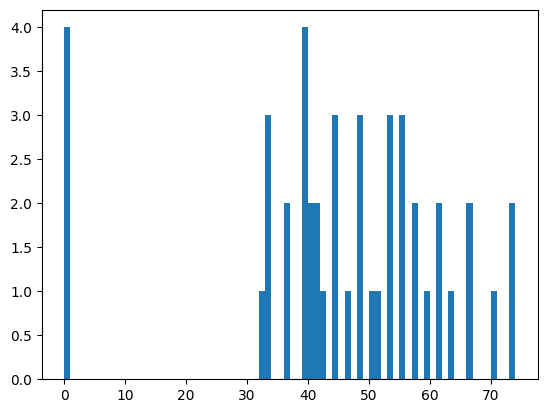

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df.Age, bins=np.arange(df.Age.min(), df.Age.max()+1))